In [30]:
from sklearn import svm
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, cluster
%matplotlib inline

In [4]:
X = [[0,0], [1,1]]
y = [0,1]
clf = svm.SVC()
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [5]:
clf.predict([[2,2], [-1,-1]])

array([1, 0])

In [3]:
"""
================================
SVM Exercise
================================

A tutorial exercise for using different SVM kernels.

This exercise is used in the :ref:`using_kernels_tut` part of the
:ref:`supervised_learning_tut` section of the :ref:`stat_learn_tut_index`.
src: http://scikit-learn.org/stable/_downloads/plot_iris_exercise.py
"""
print(__doc__)




iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:.9 * n_sample]
y_train = y[:.9 * n_sample]
X_test = X[.9 * n_sample:]
y_test = y[.9 * n_sample:]




SVM Exercise

A tutorial exercise for using different SVM kernels.

This exercise is used in the :ref:`using_kernels_tut` part of the
:ref:`supervised_learning_tut` section of the :ref:`stat_learn_tut_index`.
src: http://scikit-learn.org/stable/_downloads/plot_iris_exercise.py



In [8]:
y

array([ 1.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  2.,  1.,  1.,
        1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  1.,  1.,  2.,  2.,
        2.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,
        1.,  1.,  1.,  2.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  2.,  2.,
        2.,  1.,  2.,  1.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  1.,  2.,
        2.,  2.,  1.,  1.,  2.,  1.,  1.,  2.,  2.,  1.,  2.,  2.,  2.,
        1.,  1.,  2.,  1.,  2.,  2.,  2.,  1.,  1.])

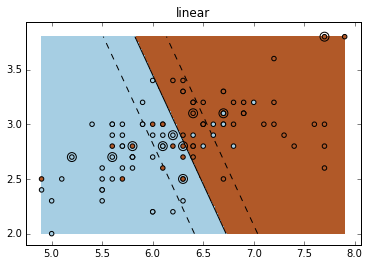

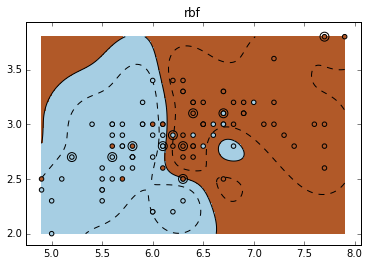

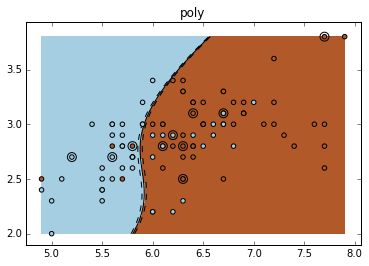

In [4]:
# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

In [15]:
df = pd.DataFrame.from_csv("omit/ai2_data.csv")
df_work = pd.DataFrame.from_csv("omit/ai2_data_work.csv")
NUM_PROJECTS = len(df)

In [16]:
# Finding tutorials by name
tutorials = {"hello_purr":"purr",
             "talk_to_me":"talk",
             "ball_bounce":"bounce",
             "digital_doodle:" : "doodle",
             "magic_8_ball": "magic",
             "paintpot" : "paint",
             "i_have_dream" : "dream",
             "pic_call": "piccall",
             "video_wall": "videowall|video_wall",
             "stockquotes": "stockquotes|stock_quotes",
             "mini_golf" : "minigolf|mini_golf",
             "space_invaders" : "spaceinvader|space_invader",
             "no_text":"notext|driving",
             "mash": "mash"}

tutorials_count = {}
total_tutorials = 0
total_working_tutorials = 0

for entry in tutorials:
    search_term = tutorials[entry]
    count_work = len(df_work[df_work.project_name.str.contains(search_term)])
    count_all = len(df[df.project_name.str.contains(search_term)])
    tutorials_count[entry] = count_work, count_all

    total_working_tutorials += count_work
    total_tutorials += count_all

print tutorials_count
print "total tutorials: " + str(total_tutorials) + "(" + str(float(total_tutorials)/ NUM_PROJECTS*100) +"%)"
print "total working tutorials: " + str(total_working_tutorials) + "(" + str(float(total_working_tutorials)/ NUM_PROJECTS*100) +"%)"

{'ball_bounce': (109, 112), 'paintpot': (162, 185), 'i_have_dream': (37, 42), 'digital_doodle:': (67, 71), 'video_wall': (3, 3), 'pic_call': (4, 4), 'magic_8_ball': (61, 68), 'mash': (122, 144), 'talk_to_me': (133, 152), 'space_invaders': (29, 30), 'mini_golf': (20, 21), 'stockquotes': (9, 9), 'hello_purr': (66, 82), 'no_text': (12, 14)}
total tutorials: 937(17.922723795%)
total working tutorials: 834(15.9525631217%)


In [49]:
#Testing clustering (really datatypes)
features = ['num_blocks', 'num_components']

data = df[features].values.astype(float) #going from df to array

n_samples, n_features = data.shape
n_clusters = 3;

k_means = cluster.KMeans(n_clusters=n_clusters)
k_means.fit(data)
est = k_means.labels_[::10]
# for i in range(len(est)):
#     if est[i]!=0:
        #print i
x = [i for i in est if est[i]!=0 ]        
df

,id,project_name,user_name,num_screens,b_component_event,b_component_method,b_component_set_get,b_lexical_variable_get,b_logic_false,b_math_add,...,b_math_convert_angles,b_lists_to_csv_table,b_math_trig,b_math_ceiling,b_math_tan,b_lists_to_csv_row,b_lists_append_list,b_math_random_set_seed,c_ProximitySensor,b_obsufcated_text


In [27]:
sample_data

array([[ 48.,   4.],
       [  5.,   1.],
       [ 19.,   5.],
       ..., 
       [  0.,   0.],
       [  8.,   3.],
       [ 35.,   7.]])

NameError: name 'plot' is not defined